## Spring 2021 CX4641/CS7641 A Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: March 9th, Tuesday, 11:59 pm AOE

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.

* Note: I was not able to figure out downloading as a PDF, even after requesting help at office hours. A TA told me it would be fine to turn in a PDF generated by (ctrl+P), so that is what I am turning in.

## Instructions for the assignment

- This assignment consists of both programming and theory questions.

- Q4 is bonus for both undergraduate and graduate students.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You can directly type Latex equations into markdown cells.

- Typing with Latex\markdown is required for all the written questions. Handwritten answers will not be accepted. 
    
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.

## Using the autograder

- You will find two assignments on Gradescope that correspond to HW2: "HW2 - Programming" and "HW2 - Non-programming".

- You will submit your code for the autograder on "HW2 - Programming" in the following format:

    * kmeans.py
    * gmm.py
    * semisupervised.py

- We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW2 - Non-programming" part, you will download your jupyter notbook as html and submit it as a PDF on Gradescope. To download the notebook as PDF, click on "File" on the top left corner of this page and select "Download as > PDF". The non-programming part corresponds to Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2.**
- **When submitting to Gradescope, please make sure to mark the page(s) corresponding to each problem/sub-problem.**

## 0 Set up
This notebook is tested under [python 3.\*.\*](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that have "raise NotImplementedError", and after you finish the coding, please delete or comment "raise NotImplementedError".

In [5]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# Load image
import imageio

%load_ext autoreload
%autoreload 2

Version information
python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
matplotlib: 3.1.0
numpy: 1.16.4
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Phred's Finicky Fishing Problem - KMeans Clustering [5 + 30 + 10 + 10 + 5 pts]

Phred, after finishing HW 1 for his Machine Learning class, decides to take a much needed vacation. Alas, the airline rules that his aquarium does not count as a carry on luggage, meaning that he has to leave it at his apartment. However, Phred is a GT student with a burning passion for maintaining biodiversity and $20 in his bank account - just enough for a small computer with a camera. Let's help Phred build a lightweight application that can count the different types of fish he has in his aquarium with the help of a clustering algorithm - KMeans.

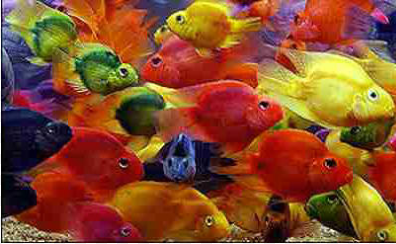

KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K clusters: $S = \{S_1, S_2, \ldots, S_K\}$ and each cluster has $\mu_i$ as its center.


### 1.1 pairwise distance [5pts]

In this section, you are asked to implement pairwise_dist function.

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

In [7]:
from kmeans import pairwise_dist

x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

# x= np.array([[ 1.62434536, -0.61175641],
#  [-0.52817175, -1.07296862]])

# y= np.array([[ 0.86540763, -2.3015387 ],
#  [ 1.74481176, -0.7612069 ],
#  [ 0.3190391,  -0.24937038]])

def pairwise_dist(x, y):
        
        y_row_num = y.shape[0]
        x_row_num = x.shape[0]
        x_repeated = np.repeat(x, y_row_num, axis=0)
        y_repeated = np.tile(y, (x_row_num,1))
        dist = (((x_repeated-y_repeated)**2).sum(axis = 1))**(1/2)
        dist = dist.reshape(x_row_num,y_row_num)
        return dist


print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]]
==y==
[[ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]]
==dist==
[[1.01483258 2.01730013 3.00021925]
 [1.62262196 0.51608057 1.03334045]]


### 1.2 KMeans Implementation [30pts]

In this section, you are asked to implement _init_centers [5pts], _update_assignment [10pts], _update_centers [10pts] and _get_loss function [5pts].

For the function signature, please see the corresponding doc strings.

In [8]:
###################################
### NO NEED TO CHANGE THIS CELL ###
###################################

from kmeans import KMeans

def image_to_matrix(image_file, grays=False):
    """
    Convert .png image to matrix
    of values.
    params:
    image_file = str
    grays = Boolean
    returns:
    img = (color) np.ndarray[np.ndarray[np.ndarray[float]]]
    or (grayscale) np.ndarray[np.ndarray[float]]
    """
    img = plt.imread(image_file)
    # in case of transparency values
    if len(img.shape) == 3 and img.shape[2] > 3:
        height, width, depth = img.shape
        new_img = np.zeros([height, width, 3])
        for r in range(height):
            for c in range(width):
                new_img[r, c, :] = img[r, c, 0:3]
        img = np.copy(new_img)
    if grays and len(img.shape) == 3:
        height, width = img.shape[0:2]
        new_img = np.zeros([height, width])
        for r in range(height):
            for c in range(width):
                new_img[r, c] = img[r, c, 0]
        img = new_img
    return img

def update_image_values(k):
    cluster_idx, centers, loss = KMeans()(image_values, k)
    updated_image_values = np.copy(image_values)

    # assign each pixel to cluster mean
    for i in range(0,k):
        indices_current_cluster = np.where(cluster_idx == i)[0]
        updated_image_values[indices_current_cluster] = centers[i]

    updated_image_values = updated_image_values.reshape(r,c,ch)
    return updated_image_values

def plot_image(img_list, title_list, figsize=(9, 12)):
    fig, axes = plt.subplots(1, len(img_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i])
        ax.set_title(title_list[i])
        ax.axis('off')

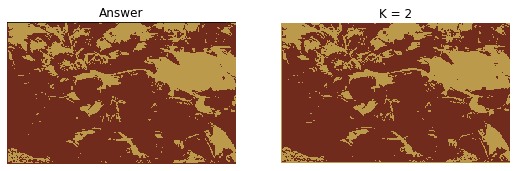

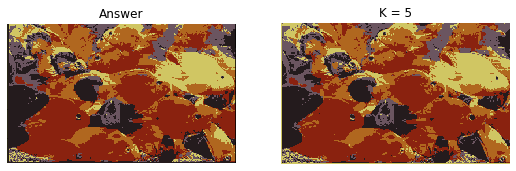

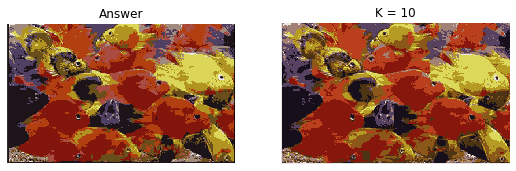

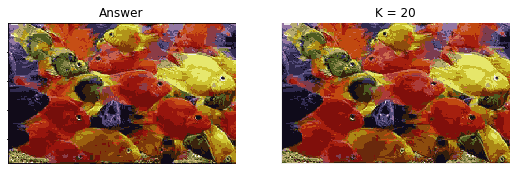

In [9]:
###################################
### NO NEED TO CHANGE THIS CELL ###
###################################

image_values = image_to_matrix('../hw2/data/images_kmeans/fish.png')

r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
# flatten the image_values
image_values = image_values.reshape(r*c,ch)

#print('Loading...')
image_2 = update_image_values(2).reshape(r, c, ch)
image_5 = update_image_values(5).reshape(r, c, ch)
image_10 = update_image_values(10).reshape(r, c, ch)
image_20 = update_image_values(20).reshape(r, c, ch)

plot_image([image_to_matrix('../hw2/data/images_kmeans/fish_2.png'), image_2], ['Answer', 'K = 2'])
plot_image([image_to_matrix('../hw2/data/images_kmeans/fish_5.png'), image_5], ['Answer', 'K = 5'])
plot_image([image_to_matrix('../hw2/data/images_kmeans/fish_10.png'), image_10], ['Answer', 'K = 10'])
plot_image([image_to_matrix('../hw2/data/images_kmeans/fish_20.png'), image_20], ['Answer', 'K = 20'])

### 1.3 Elbow Method [6 pts Programming + 4 pts Written Questions]

One of the biggest drawbacks of KMeans is that we need to know the number of clusters beforehand. Let's see if we can upgrade Phred's software by implementing the elbow method to find the optimal number of clusters in the function find_optimal_num_clusters below.

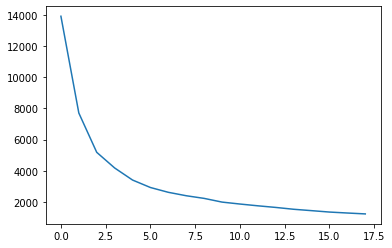

In [10]:
###################################
### NO NEED TO CHANGE THIS CELL ###
###################################

from kmeans import find_optimal_num_clusters

losses = find_optimal_num_clusters(image_values)
plt.plot(losses)

#### Written Questions [4 pts]:

1) Approximately what value does the elbow method give? Roughly how many species of fish were there? Was the elbow method roughly accurate?

Plotting the loss values and the number of clusters, the elbow method shows that the optimal number of clusters is approximately five, meaning there are about 5 species of fish there. This is roughly accurate because there are around 5 colors of fish in the original picture -- red, orange, yellow, green, and purple.
 
2) Phred comes up with another idea - to optimize the number of clusters, just choose a k that makes the loss close to 0. Would this work? Why or why not? Use your answer for question 1 and the images from part 1.2 to help support your answer 

Simply using the number of clusters which makes losses closest to 0 would not provide meaningful results. This means we would have a large number of clusters, such as k=20 from the previous problem. While the losses are minimized, the output is very close to the original picture and it provides us no significant information on how many types of species there are, since clearly there are much less than 20 species. 

### 1.4 Normalized Cut [10 pts for CS 7641; 10 points Bonus for CS 4641]

The normalized cut is another useful criterion for assessing the natural number of clusters. It measures both the total dissimilarity between different clusters as well as the total similarity within groups. The formula for the normalized cut is:

$$NC = \sum_{i=1}^k \frac{W(C_i, \bar{C_i})}{W(C_i, C_i)+W(C_i, \bar{C_i})}$$



Where $W(C_i, C_i)$ is the intra-cluster distance and $W(C_i, \bar{C_i})$ is the inter-cluster distance. The higher the normalized cut value, the better the clustering.

In [ ]:
###################################
### NO NEED TO CHANGE THIS CELL ###
###################################

from kmeans import intra_cluster_dist, inter_cluster_dist, normalized_cut

def plot_normalized_cut(data, max_K=15):
    """
    Plot the normalized cut for different number of clusters, no need to implement
    """
    clusters = np.arange(2, max_K+1)
    
    normalized_cuts = []
    for k in range(2, max_K+1):
        label, _, _ = KMeans()(data, k)
        normalized_cuts.append(normalized_cut(data, label))
    plt.plot(clusters, normalized_cuts)
    return normalized_cuts

np.random.seed(1)
data = np.random.rand(200,3) * 100
plot_normalized_cut(data)

### Limitation of K-Means

One of the limitations of K-Means Clustering is that it dependes largely on the shape of the dataset. A common example of this is trying to cluster one circle within another (concentric circles). A K-means classifier will fail to do this and will end up effectively drawing a line which crosses the circles. You can visualize this limitation in the cell below.

In [ ]:
# visualize limitation of kmeans, do not have to implement
from sklearn.datasets.samples_generator import (make_circles, make_moons)

X1, y1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, y2 = make_moons(noise=0.05, n_samples=1500)

def visualise(X, C, K):# Visualization of clustering. You don't need to change this function   
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

cluster_idx1, centers1, loss1 = KMeans()(X1, 2)
visualise(X1, cluster_idx1, 2)

cluster_idx2, centers2, loss2 = KMeans()(X2, 2)
visualise(X2, cluster_idx2, 2)

### 1.5 Autograder test to find centers for data points [5 pts]

To obtain these 5 points, you need to be pass the tests set up in the autograder. These will test the centers created by your implementation. Be sure to upload the correct files to obtain these points.

## 2. EM algorithm [15 pts]



A univariate Gaussian Mixture Model (GMM) has two components, both of which have their own mean and standard deviation. The model is defined by the following parameters:

$$ \mathbf{z} \sim Bernoulli(\theta) $$
$$ \mathbf{p(x|z=0)} \sim \mathcal{N}(0, \sigma^{2}) $$
$$ \mathbf{p(x|z=1)} \sim \mathcal{N}(0, 5\sigma^{2}) $$

For a dataset of N datapoints, find the following: 

(**Hint:** Please assume $p(z=0)=\theta$, $p(z=1)=1-\theta$)


2.1.1. Write the marginal probability of x, i.e. $\mathbf{p(x)}$  \[5pts] 

$$p(x) = \sum_{z} p(z)p(x|z) = p(z=0)p(x|z=0) + p(z=1)p(x|x=1)$$
$$p(x) = \theta* N(0, \sigma^2) + (1-\theta)*N(0, 5\sigma^2)$$


2.1.2. E-Step: Compute the posterior probability, i.e, $p(z^i=k|x^i)$, where k = {0,1} \[5pts]

When k = 0, 

$$p(z^i = 0|x^i) = \frac{\theta N(0, \sigma^2)}{\theta* N(0, \sigma^2) + (1-\theta)*N(0, 5\sigma^2)}$$

When k = 1,

$$p(z^i = 1|x^i) = \frac{(1 - \theta) N(0, 5\sigma^2)}{\theta* N(0, \sigma^2) + (1-\theta)*N(0, 5\sigma^2)}$$

2.1.3. M-Step: Compute the updated value for $\sigma^{2}$ \[5pts]

$$\sigma^2_{new} = arg max_\sigma^2 \sum{z} p(\theta|x, \theta)*ln[p(x, z|\theta)]$$

$$\sigma^2_{new} = argmax_\sigma^2 [\tau(z_0)ln(\theta^2*N(0, \sigma^2) + \tau(z_1)ln((1-\theta)^2*N(0, 5\sigma^2))]$$

$$\sigma^2_{new} = argmax_\sigma^2 [\tau(z_0)*ln(\frac{\theta^2}{\sqrt{2\pi \sigma^2}}*e^{-x_n^2/\sigma^2})
+ \tau(z_1)*ln(\frac{(1-\theta)^2}{\sqrt{10\pi \sigma^2}}*e^{-x_n^2/5\sigma^2})]$$

$$\sigma^2_{new} = argmax_\sigma^2 [\tau(z_0)(2ln(\theta) + ln(\frac{1}{\sqrt{2\pi \sigma^2}} - \frac{x_n^2}{\sigma^2}))
+ \tau(z_1)(2ln(1-\theta) + ln(\frac{1}{\sqrt{10\pi \sigma^2}} - \frac{x_n^2}{10\sigma^2}))]$$

$$ \frac{d\sigma^2_{new}}{d\sigma^2} = \tau(z_0) (\frac{-1}{2\sigma^2} + \frac{x_n^2}{\sigma^4}) +
\tau(z_1) (\frac{-1}{2\sigma^2} + \frac{x_n^2}{10\sigma^4}) = 0 $$

$$\sigma^2_{new} = \frac{10x_n^2\tau(z_0) + x_n^2\tau(z_1)}{5\tau(z_0)+5\tau(z_1)}$$

## 3. GMM implementation [40 + 10 + 5(bonus for all) pts]

A Gaussian Mixture Model(GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian Distribution. In a nutshell, GMM is a soft clustering algorithm in a sense that each data point is assigned to a cluster with a probability. In order to do that, we need to convert our clustering problem into an inference problem.

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]^T$, where $x_i \in \mathbb{R}^D$. Let $\pi$ be a K-dimensional probability distribution and $(\mu_k; \Sigma_k)$ be the mean and covariance matrix of the $k^{th}$ Gaussian distribution in $\mathbb{R}^d$. 

The GMM object implements EM algorithms for fitting the model and MLE for optimizing its parameters. It also has some particular hypothesis on how the data was generated:

- Each data point $x_i$ is assigned to a cluster $k$ with probability of $\pi_k$ where $\sum_{k=1}^K \pi_k = 1$
- Each data point $x_i$ is generated from Multivariate Normal Distribution $\cal{N}(\mu_k, \Sigma_k)$ where $\mu_k \in \mathbb{R}^D$ and $\Sigma_k \in \mathbb{R}^{D\times D}$

Our goal is to find a $K$-dimension Gaussian distributions to model our data $X$. This can be done by learning the parameters $\pi, \mu$ and $\Sigma$ through likelihood function. Detailed derivation can be found in our slide of GMM. The log-likelihood function now becomes:

\begin{align}
    \text{ln } p(x_1, \dots, x_N | \pi, \mu, \Sigma) = \sum_{i=1}^N \text{ln } \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \Sigma_k)\big)
\end{align}

From the lecture we know that MLEs for GMM all depend on each other and the responsibility $\tau$. Thus, we need to use an iterative algorithm (the EM algorithm) to find the estimate of parameters that maximize our likelihood function. **All detailed derivations can be found in the lecture slide of GMM.**

- **E-step:** Evaluate the responsibilities

In this step, we need to calculate the responsibility $\tau$, which is the conditional probability that a data point belongs to a specific cluster $k$ if we are given the datapoint, i.e. $P(z_k|x)$. The formula for $\tau$ is given below:

$$
\tau\left(z_k\right)=\frac{\pi_{k} N\left(x | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x | \mu_{j}, \Sigma_{j}\right)}, \quad \text{for } k = 1, \dots, K
$$
Note that each data point should have one probability for each component/cluster. For this homework, you will work with $\tau\left(z_k\right)$ which has a size of $N\times K$ and you should have all the responsibility values in one matrix. **We use gamma as $\tau$ in this homework**.

- **M-step:** Re-estimate Paramaters

After we obtained the responsibility, we can find the update of parameters, which are given below:

\begin{align}
\mu_k^{new} &= \dfrac{\sum_{n=1}^N \tau(z_k)x_n}{N_k} \\
\Sigma_k^{new} &= \dfrac{1}{N_k}\sum_{n=1}^N \tau (z_k)^T(x_n - \mu_k^{new})^T(x_n-\mu_k^{new}) \\
\pi_k^{new} &= \dfrac{N_k}{N}
\end{align}
where $N_k = \sum_{n=1}^N \tau(z_k)$. Note that the updated value for $\mu_k$ is used when updating $\Sigma_k$. The multiplication of $\tau (z_k)^T(x_n - \mu_k^{new})^T$ is element-wise so it will preserve the dimensions of $(x_n - \mu_k^{new})^T$.

- We repeat E and M steps until the incremental improvement to the likelihood function is small.


**Special Notes**
- For undergraduate students: you may assume that the covariance matrix $\Sigma$ is a **diagonal matrix**, which means the features are independent. (i.e. the red intensity of a pixel is independent of its blue intensity, etc). 
- For graduate students: please assume a **full covariance matrix**.
- The class notes assume that your dataset $X$ is $(D, N)$. **However, the homework dataset is $(N, D)$ as mentioned on the instructions, so the formula is a little different from the lecture note in order to obtain the right dimensions of parameters.**

**Hints**

1. **DO NOT USE FOR LOOPS OVER N.** You can always find a way to avoid looping over the observation data points in our homework problem. If you have to loop over D or K, that would be fine.

2. You can initiate $\pi(k)$ the same for each $k$, i.e. $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$. You can use KMeans implemented above to initialize the centers.

3. In part 3 you are asked to generate the model for pixel clustering of image. We will need to use a multivariate Gaussian because each image will have $N$ pixels and $D=3$ features, which correspond to red, green, and blue color intensities. It means that each image is a $(N\times3)$ dataset matrix. In the following parts, remember $D=3$ in this problem.

4. To avoid using for loops in your code, we recommend you take a look at the concept [Array Broadcasting in Numpy](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy). Also, some calculations that require different shapes of arrays can be achieved by broadcasting. 

5. Be careful of the dimensions of your parameters. Before you test anything on the autograder, please look at the instructions below on the shapes of the variables you need to output. This could enhance the functionality of your code and help you debug. Also notice that **a numpy array in shape $(N,1)$ is NOT the same as that in shape $(N,)$** so be careful and consistent on what you are using. You can see the detailed explanation here. [Difference between numpy.array shape (R, 1) and (R,)](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r)
 - The dataset $X$: $(N, D)$
 - $\mu$: $(K, D)$. 
 - $\Sigma$: $(K, D, D)$
 - $\tau$: $(N, K)$
 - $\pi$: array of length $K$
 - ll_joint: $(N, K)$

## 3.1 Helper functions [15 pts]

To facilitate some of the operations in the GMM implementation, we would like you to implement the following three helper functions. In these functions, "logit" refers to an input array of size $(N, D)$. Remember the goal of helper functions is to facilitate our calculation so **DO NOT USE FOR LOOP ON N**.

### 3.1.1. softmax [5 pts]

Given $logit \in \mathbb{R}^{N \times D}$, calculate $prob \in \mathbb{R}^{N \times D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{d=1}^D exp(logit_{i, d})}$.

Note: it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerically stable, you need to subtract the maximum for each row of $logits$, and then add it back in your result.

### 3.1.2. logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N \times D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function. Note: This function is used in the call() function which is given, so you will not need it in your own implementation. It helps calculate the loss of log-likehood. 


### 3.1.3. Multivariate Gaussian PDF [5 pts]
You should be able to write your own function based on the following formula, and you are **NOT allowed** to use outside resource packages other than those we provided. 

**(for undergrads only) normalPDF**

Using the covariance matrix as a diagonal matrix with variances of the individual variables appearing on the main diagonal of the matrix and zeros everywhere else means that we assume the features are independent. In this case, the multivariate normal density function simplifies to the expression below:
$$\mathcal{N}(x: \mu, \Sigma) = \prod_{i=1}^D \frac{1}{\sqrt{2\pi\sigma_i^2}}\exp{\left( -\frac{1}{2\sigma_i^2} (x_i-\mu_i)^2\right)}$$
where $\sigma^2_i$ is the variance for the $i^{th}$ feature, which is the diagonal element of the covariance matrix.

**(for grads only) multinormalPDF**

Given the dataset $X \in \mathbb{R}^{N \times D}$, the mean vector $\mu \in \mathbb{R}^{D}$ and covariance matrix $\Sigma \in \mathbb{R}^{D \times D}$ for a multivariate Gaussian distrubution, calculate the probability $p \in \mathbb{R}^{N}$ of each data. The PDF is given by 
$$\mathcal{N}(X: \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}}|\Sigma|^{-1/2}\exp{\left(-\frac{1}{2}(X-\mu)\Sigma^{-1}(X-\mu)^T\right)}$$
where $|\Sigma|$ is the determinant of the covariance matrix.


**Hints**
- If you encounter "LinAlgError", you can mitigate your number/array by summing a small value before taking the operation, e.g. np.linalg.inv(\$\Sigma_k$ + SIGMA_CONST). You can arrest and handle such error by using [Try and Exception Block](https://realpython.com/python-exceptions/#the-try-and-except-block-handling-exceptions) in Python.

- In the above calculation, you must avoid computing a $(N,N)$ matrix. Using the above equation for large N will crash your kernel and/or give you a memory error on Gradescope. Instead, you can do this same operation by calculating $(X-\mu)\Sigma^{-1}$, a $(N,D)$ matrix, transpose it to be a $(D,N)$ matrix and do an element-wise multiplication with $(X-\mu)^T$, which is also a $(D,N)$ matrix. Lastly, you will need to sum over the 0 axis to get a $(1,N)$ matrix before proceeding with the rest of the calculation. This uses the fact that doing an element-wise multiplication and summing over the 0 axis is the same as taking the diagonal of the $(N,N)$ matrix from the matrix multiplication. 
- In Numpy implementation for $\mu$, you can either use a 2-D array with dimension $(1,D)$ for each Gaussian Distribution, or a 1-D array with length $D$. Same to other array parameters. Both ways should be acceptable but pay attention to the shape mismatch problem and be **consistent all the time** when you implement such arrays. 

## 3.2 GMM Implementation [25 pts]

Things to do in this problem:
### 3.2.1. Initialize parameters in _init_components() [5 pts]

Examples of how you can initialize the parameters. 
  1. Set the prior probability $\pi$ the same for each class.
  2. Initialize $\mu$ by randomly selecting K numbers of observations as the initial mean vectors or use KMeans to initialize the centers, and initialize the covariance matrix with np.eye() for each k. For grads, you can also initialize the $\Sigma$ by K diagonal matrices. It will become a full matrix after one iteration, as long as you adopt the correct computation.
  3. Other ways of initialization are acceptable and welcome.

### 3.2.2. Formulate the log-likelihood function _ll_joint() [5 pts]

The log-likelihood function is given by:
\begin{align}
    \ell(\theta) = \sum_{i=1}^N \text{ln } \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \Sigma_k)\big)
\end{align}
In this part, we will generate a $(N,K)$ matrix where each datapoint $x_i, \forall i = 1, \dots, N$ has $K$ log-likelihood numbers. Thus, for each $i = 1, \dots, N$ and $k = 1, \dots, K$, 
$$
\text{log-likelihood}[i,k] = \log{\pi_k}+\log{\cal{N}(x_i|\mu_k, \Sigma_k)}
$$

**Hints:**
- If you encounter "ZeroDivisionError" or "RuntimeWarning: divide by zero encountered in log", you can mitigate your number/array by summing a small value before taking the operation, e.g. np.log(\$\pi_k$ + 1e-32). 
- You need to use the Multivariate Normal PDF function you created in the last part. Remember the PDF function is for each Gaussian Distribution (i.e. for each k) so you need to use a for loop over K. 


### 3.2.3. Setup Iterative steps for EM Algorithm  [5+10 pts]

You can find the detail instruction in the above description box. 

**Hints:**
- For E steps, we already get the log-likelihood at _ll_joint() function. This is not the same as responsibilities ($\tau$), but you should be able to finish this part with just a few lines of code by using _ll_joint() and softmax() defined above. 
- For undergrads: Try to simplify your calculation for $\Sigma$ in M steps as you assumed independent components. Make sure you are only taking the diagonal terms of your calculated covariance matrix.

### Function Tests###

Use these to test if your implementation of functions in GMM work as expected

In [11]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from gmm import GMM

In [12]:
np.random.seed(1)

data = np.random.randn(4, 3)

# test softmax utility
my_softmax = GMM(data, 3).softmax(data)
expected_softmax = np.array([[0.81761761, 0.08738232, 0.09500007],
       [0.12135669, 0.84312089, 0.03552242],
       [0.75647821, 0.0617229 , 0.18179889],
       [0.14923883, 0.82635643, 0.02440474]])

print("Your softmax works within the expected range: ", np.allclose(expected_softmax, my_softmax))


# test logsumexp utility
my_logsumexp = GMM(data, 3).logsumexp(data)
print(GMM(data,3))
expected_logsumexp = np.array([[1.82570589],
 [1.03605256],
 [2.02389331],
 [1.65283702]])

print("Your logsumexp works within the expected range: ", np.allclose(expected_logsumexp, my_logsumexp))


# init random
points = np.random.randn(12, 3)

mu = np.array([[-0.74715829,  1.6924546,   0.05080775],
 [-1.09989127, -0.17242821, -0.87785842],
 [-0.3224172,  -0.38405435,  1.13376944]])

sigma = np.array([[[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],
       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],
       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])
pi = np.ones(3)/3

Your softmax works within the expected range:  True
Your logsumexp works within the expected range:  True


In [13]:
# For undergrads

# test normalPDF
my_normalpdf = GMM(points, 3).normalPDF(points, mu[0], sigma[0])
expected_normal_pdf = np.array([0.0037374 , 0.00681159, 0.01294674, 0.00700474, 0.00095577,
       0.00813925, 0.00544499, 0.00385966, 0.00561288, 0.00228524,
       0.06349364, 0.00250289])

print("Your normal pdf works within the expected range: ", np.allclose(expected_normal_pdf, my_normalpdf))


# test ll-joint
my_lljoint = GMM(points, 3)._ll_joint(pi, mu, sigma,False)
expected_lljoint = np.array([[-6.68797812, -6.20337699, -3.85542789],
       [-6.08774253, -3.85542789, -6.20337698],
       [-5.44552376, -4.81763731, -6.88557037],
       [-6.05977986, -7.90402129, -5.95737486],
       [-8.05161039, -6.27262476, -5.43812535],
       [-5.90966969, -4.86498535, -4.23232988],
       [-6.31167075, -3.98209541, -5.58159406],
       [-6.65578947, -4.38655011, -4.69047683],
       [-6.28130441, -7.15820124, -4.50096327],
       [-7.17989628, -5.55202701, -6.48346667],
       [-3.85542789, -6.08774255, -6.6879781 ],
       [-7.08892294, -8.46315357, -4.53725014]])

print("Your lljoint works within the expected range: ", np.allclose(my_lljoint, expected_lljoint))

# test E step
my_estep = GMM(points, 3)._E_step(pi, mu, sigma)
expected_estep = np.array([[0.05098852, 0.08278125, 0.86623023],
       [0.08918842, 0.83136246, 0.07944912],
       [0.3214852 , 0.60234958, 0.07616522],
       [0.44131069, 0.06979118, 0.48889813],
       [0.04861361, 0.28797946, 0.66340693],
       [0.10876892, 0.30917578, 0.5820553 ],
       [0.074913  , 0.76962456, 0.15546244],
       [0.0561508 , 0.54309286, 0.40075634],
       [0.13609235, 0.05662422, 0.80728343],
       [0.12346309, 0.62879889, 0.24773802],
       [0.85752822, 0.09199548, 0.0504763 ],
       [0.07101476, 0.01796916, 0.91101608]])


print("Your E step works within the expected range: ", np.allclose(my_estep, expected_estep))

# test M step
my_pi, my_mu, my_sigma = GMM(points, 3)._M_step(expected_estep, False)
expected_pi = np.array([0.19829313, 0.35762874, 0.44407813])
expected_mu = np.array([[-0.20989007,  0.79579186,  0.06554929],
        [-0.35741548, -0.1535599 , -0.4876455 ],
        [-0.28772515, -0.07512445,  0.79292111]])
expected_sigma = np.array([[[0.64857055, 0.        , 0.        ],
         [0.        , 0.63446774, 0.        ],
         [0.        , 0.        , 0.62167826]],
 
        [[0.53473119, 0.        , 0.        ],
         [0.        , 0.23538075, 0.        ],
         [0.        , 0.        , 0.38671205]],
 
        [[0.62612107, 0.        , 0.        ],
         [0.        , 0.24611766, 0.        ],
         [0.        , 0.        , 0.88668642]]])
print("Your M step works within the expected range: ", np.allclose(my_pi, expected_pi) and np.allclose(my_mu, expected_mu) and np.allclose(my_sigma, expected_sigma))

Your normal pdf works within the expected range:  True
Your lljoint works within the expected range:  True
Your E step works within the expected range:  True
Your M step works within the expected range:  True


In [ ]:
# For grads
# # test mutlinormalPDF
sigma_grad = np.array([[[ 0.12015895,  0.61720311,  0.30017032],
        [-0.35224985, -1.1425182 , -0.34934272],
        [-0.20889423,  0.58662319,  0.83898341]],

       [[ 0.93110208,  0.28558733,  0.88514116],
        [-0.75439794,  1.25286816,  0.51292982],
        [-0.29809284,  0.48851815, -0.07557171]],

       [[ 1.13162939,  1.51981682,  2.18557541],
        [-1.39649634, -1.44411381, -0.50446586],
        [ 0.16003707,  0.87616892,  0.31563495]]])
my_multinormalpdf = GMM(data, 3).multinormalPDF(points, mu[0], sigma_grad[0])
expected_multinormal_pdf = np.array([8.70516304e-074, 8.62201632e-001, 5.36048920e+015, 2.99498046e+188,
       6.91708798e+083, 9.96882978e-062, 7.03348279e-025, 2.16083146e-059,
       1.87537738e-086, 1.84295981e+075, 1.11845126e+000, 5.17746613e-097])

print("Your multinormal pdf works within the expected range: ", np.allclose(expected_multinormal_pdf, my_multinormalpdf))


# test ll-joint
sigma_now = sigma * 0.5
my_lljoint = GMM(points, 3)._ll_joint(pi, mu, sigma_now, True)
expected_lljoint = np.array([[ -8.48080757,  -7.51160532,  -2.81570712],
       [ -7.28033641,  -2.81570712,  -7.51160531],
       [ -5.99589887,  -4.74012597,  -8.87599209],
       [ -7.22441107, -10.91289393,  -7.01960107],
       [-11.20807212,  -7.65010086,  -5.98110204],
       [ -6.92419072,  -4.83482203,  -3.56951111],
       [ -7.72819284,  -3.06904217,  -6.26803946],
       [ -8.41643028,  -3.87795155,  -4.485805  ],
       [ -7.66746017,  -9.42125381,  -4.10677788],
       [ -9.4646439 ,  -6.20890536,  -8.07178468],
       [ -2.81570712,  -7.28033643,  -8.48080755],
       [ -9.28269723, -12.03115847,  -4.17935163]])

print("Your lljoint works within the expected range: ", np.allclose(my_lljoint, expected_lljoint))


# test E step
my_estep = GMM(points, 3)._E_step(pi, mu, sigma_now)
expected_estep = np.array([[3.42169503e-03, 9.01904364e-03, 9.87559261e-01],
       [1.12762023e-02, 9.79775837e-01, 8.94796041e-03],
       [2.18977456e-01, 7.68731442e-01, 1.22911017e-02],
       [4.43990237e-01, 1.11041589e-02, 5.44905604e-01],
       [4.49802848e-03, 1.57844511e-01, 8.37657460e-01],
       [2.65137773e-02, 2.14226353e-01, 7.59259870e-01],
       [9.02095401e-03, 9.52129225e-01, 3.88498209e-02],
       [6.87345697e-03, 6.43000762e-01, 3.50125781e-01],
       [2.75025136e-02, 4.76112393e-03, 9.67736363e-01],
       [3.22944111e-02, 8.37677122e-01, 1.30028467e-01],
       [9.85247145e-01, 1.13391711e-02, 3.41368409e-03],
       [6.03734929e-03, 3.86549176e-04, 9.93576102e-01]])


print("Your E step works within the expected range: ", np.allclose(my_estep, expected_estep))

# test M step
my_pi, my_mu, my_sigma = GMM(points, 3)._M_step(expected_estep, True)
expected_pi = np.array([0.1479711 , 0.38249961, 0.46952929])
expected_mu = np.array([[-0.15519344,  1.22500376,  0.03548931],
       [-0.36778399, -0.18068954, -0.65203503],
       [-0.28448252, -0.09079301,  0.92618845]])
expected_sigma = np.array([[[ 0.67247982, -0.25027742,  0.0774841 ],
        [-0.25027742,  0.34077941,  0.04853111],
        [ 0.0774841 ,  0.04853111,  0.2987035 ]],

       [[ 0.49792869,  0.07842407, -0.09002534],
        [ 0.07842407,  0.1618932 , -0.10696588],
        [-0.09002534, -0.10696588,  0.20401203]],

       [[ 0.65130447,  0.0049166 , -0.39258756],
        [ 0.0049166 ,  0.22371688,  0.18769942],
        [-0.39258756,  0.18769942,  0.70840301]]])
print("Your M step works within the expected range: ", np.allclose(my_pi, expected_pi) and np.allclose(my_mu, expected_mu) and np.allclose(my_sigma, expected_sigma))

## 3.3 Image Compression and pixel clustering [10pts + 5pts]

Images typically need a lot of bandwidth to be transmitted over the network. In order to optimize this process, most image processors perform lossy compression of images (lossy implies some information is lost in the process of compression).

In this section, you will use your GMM algorithm implementation to do pixel clustering and compress the images. That is to say, you would develop a lossy image compression algorithm. 
(Hint: you can adjust the number of clusters formed and justify your answer based on visual inspection of the resulting images or on a different metric of your choosing)
#### You do NOT need to submit your code for this question to the autograder. Instead you should include whatever images/information you find relevant in the report.


In [14]:
# helper function for performing pixel clustering. You don't have to modify it
def cluster_pixels_gmm(image, K, full_matrix = True):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM(flat_img, K = K, max_iters = 10)(full_matrix)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

iter 9, loss: 2329492.0072: 100%|██████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.26it/s]


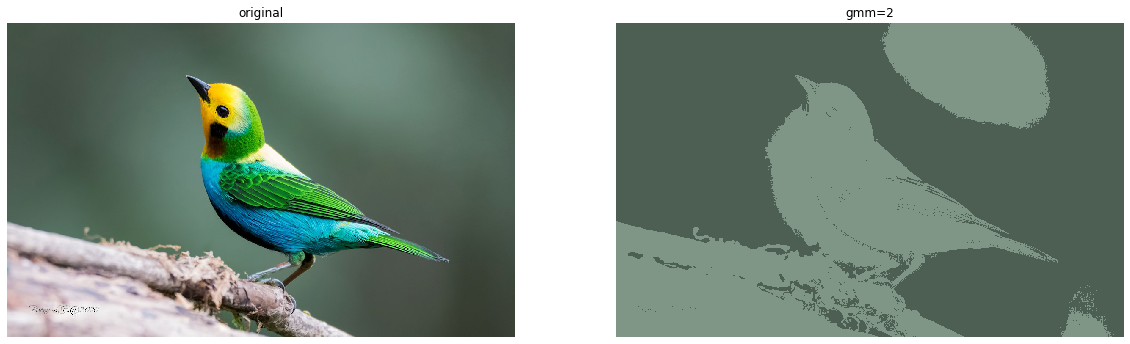

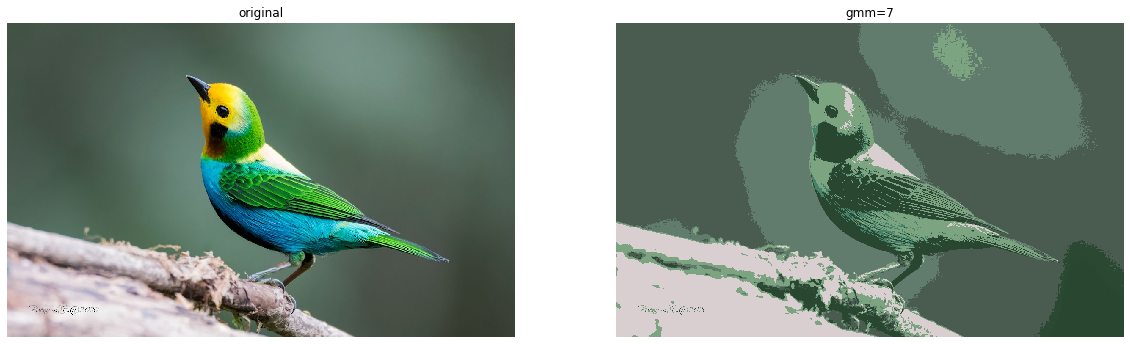

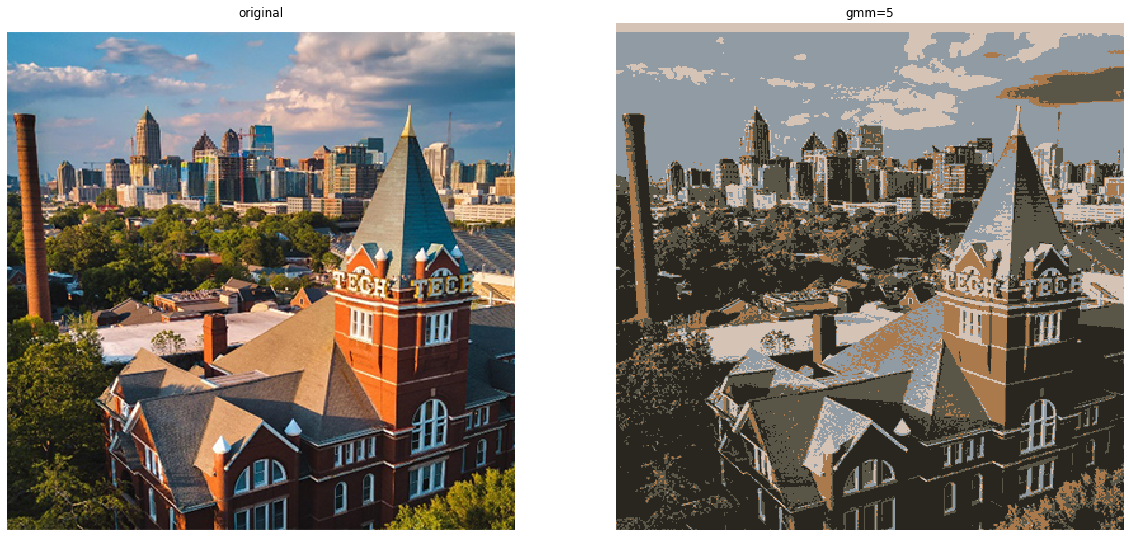

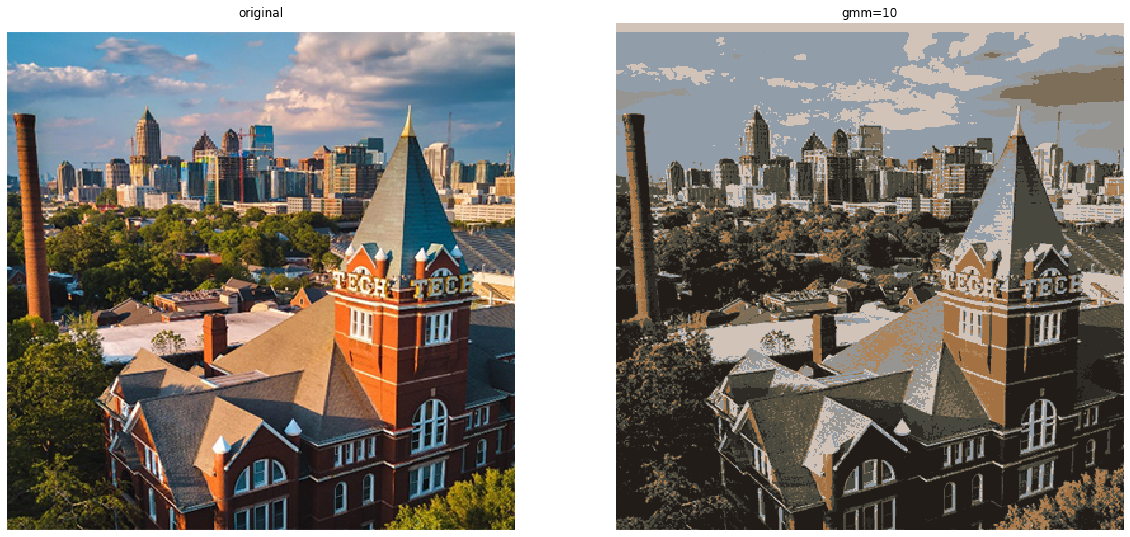

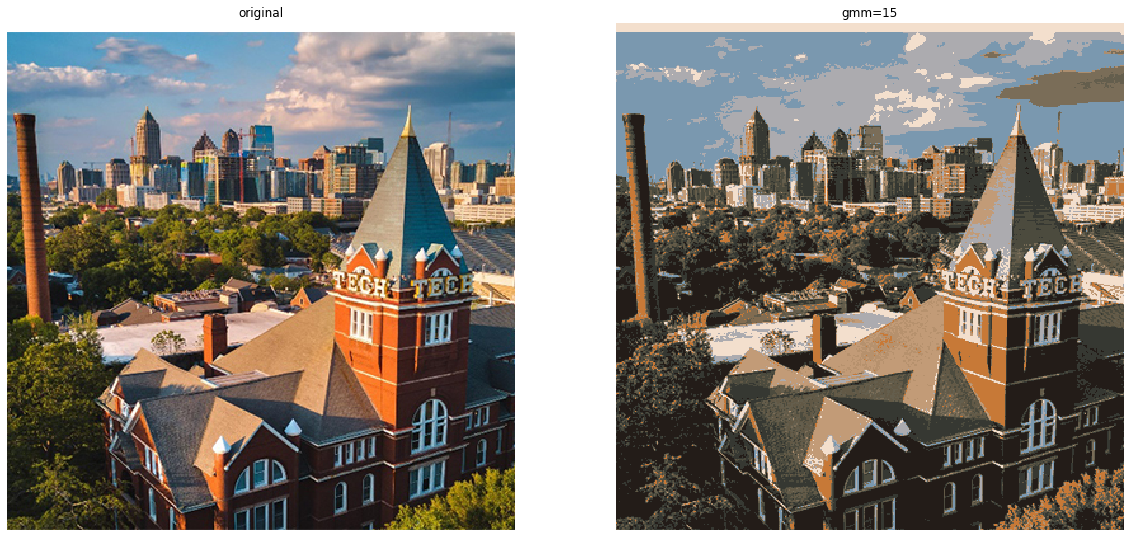

In [16]:
# helper function for performing pixel clustering. You don't have to modify it
# pick 2 of the images in this list:
url1 = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/e/e2/BroadwayTowerSeamCarvingA.png'
url3 = 'https://www.electrochem.org/wp-content/uploads/2019/09/GeorgiaTech400x400.jpg'

# example of loading image from url1
image = imageio.imread(imageio.core.urlopen(url1).read())

# this is for you to implement
def perform_compression(image, min_clusters=5, max_clusters=15):
    """
    Using the helper function above to find the optimal number of clusters that can appropriately produce a single image.
    You can simply examinate the answer based on your visual inspection (i.e. looking at the resulting images) or provide any metrics you prefer. 
    
    Args:
        image: input image of shape(H, W, 3)
        min_clusters, max_clusters: the minimum and maximum number of clusters you should test with. Default are 5a dn 15.
        (Usually the maximum number of clusters would not exeed 15)
        
    Return:
        plot: comparison between original image and image pixel clustering.
        optional: any other information/metric/plot you think is necessary.
    """
    for K in range(min_clusters, max_clusters+1, 5):
        gmm_image_k = cluster_pixels_gmm(image, K, full_matrix = True)
        plot_images([image, gmm_image_k], ['original', 'gmm='+str(K)])

image1 = imageio.imread(imageio.core.urlopen(url1).read())
perform_compression(image1, 2, 10)

image3 = imageio.imread(imageio.core.urlopen(url3).read())
perform_compression(image3, 5, 15)

Trying different values for sizes of clusters with GMM, it is difficult to simply know what the optimal k-value is for the most
informative, meaningful results. However, there are some obvious things to point out with both images.
* For the bird image, gmm=2 is not a good parameter because it loses the essence of the picture. For gmm=7 on the same picture, the details are much more pronounced, as expected withh a larger number of clusters -- this is much more informative than gmm=2
* For the Tech Tower image, we can only observe very subtle differences in the images when gmm=5, gmm=10, and gmm=15. The optimal number of clusters should then be 5 because increasing cluster size unnecessarily only blurs the focus of the problem, and only five clusters are necessary to make distinctions in color.

### (Bonus for all) [5 pts]
Compare full covariance matrix with diagonal covariance matrix. Can you explain why the images are different with same clusters?
Note: You will have to implement both multinormalPDF and normalPDF, and add a few arguments in the original _ll_joint() and _Mstep() function. You will earn full credit only if you implement both functions AND explain the reason.

In [ ]:
def compare_matrix(image, K):
    """
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
        
    Return:
        plot: comparison between full covariance matrix and diagonal covariance matrix.
    """
    #full covariance matrix
    gmm_image_full = cluster_pixels_gmm(image, K, full_matrix = True)
    #diagonal covariance matrix
    gmm_image_diag = cluster_pixels_gmm(image, K, full_matrix = False)
    
    plot_images([gmm_image_full, gmm_image_diag], ['full covariance matrix', 'diagonal covariance matrix'])

In [ ]:
compare_matrix(image1, 5)

## 4. (Bonus for All) Cleaning Messy data with semi-supervised learning[30pts]

Learning to work with messy data is a hallmark of a well-rounded data scientist. In most real-world settings the data given will usually have some issue, so it is important to learn skills to work around such impasses. This part of the assignment looks to expose you to clever ways to fix data using concepts that you have already learned in the prior questions.

#### Question

You are an aspiring astronomer looking to help out your department. The project being worked on right now is quasar detection. A quasar is essentially a giant black hole with its mass million to billion times that of our sun and it is surround by a gaseous accreation disk. Luckily for us, these objects are very far away from us, but unlucky for astronomers, their distance makes them hard to identify. A new method of identification is being used which looks to identify the quasars by the electrogmagnetic radiation they emit. The data given to you consists of 3 features which represent the frequency bands of radio, infared, and gamma rays. There has been some very extensive feature engineering already done and each of the frequency bands are scaled to similar certain distribution with high degrees of signifigance. The fourth column shows the label with 1 being a quasar and 0 not being a quasar. 

However, due to a software bug in logging the quasar data, 20% of the entries are missing labels and 30% are missing characterization data. Since simply removing the corrupted entries would not reflect the true variance of the data, your job is to implement a solution to clean the data so it can be properly classified. 

Your job is to assist your department in cleaning the data and implementing a semi-supervised learning framework to help them create a general classifier.

You are given four files for this task:
* Labeled_quasar_complete.txt: containing the complete material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Labeled_quasar_incomplete.txt: containing partial material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Unlabeled_quasar.txt: containing only complete material characterization results;
* Independent_quasar.txt: a labeled dataset the students obtained from a previous student in the laboratory, which you can use to test your model after training.

[Here is the inspiration for the idea to those interested](https://arxiv.org/pdf/1804.05051.pdf). Definitely note that there was generous liberties given to simplifying the data.  

### 4.1 KNN [10pts]
The first step in this task is to clean the Labeled_incomplete dataset by filling in the missing values with probable ones derived from complete data. A useful approach to this type of problem is using a k-nearest neighbors (k-NN) algorithm. For this application, the method consists of replacing the missing value of a given point with the mean of the closest k-neighbors to that point.

In [ ]:
from semisupervised import CleanData

Below is a good expectation of what the process should look like on a toy dataset. If your output matches the answer below, you are on the right track. 

In [ ]:
complete_data = np.array([[1.,2.,3.,1],[7.,8.,9.,0],[16.,17.,18.,1],[22.,23.,24.,0]])
incomplete_data = np.array([[1.,np.nan,3.,1],[7.,np.nan,9.,0],[np.nan,17.,18.,1],[np.nan,23.,24.,0]])

clean_data = CleanData()(incomplete_data, complete_data, 2)
print("*** Expected Answer - k = 2 ***")
print("""==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]""")

print("\n*** My Answer - k = 2***")
print(clean_data)

### 4.2 Getting acquainted with semi-supervised learning approaches. [5pts]

You will implement a version of the algorithm presented in Table 1 of the paper ["Text Classification from Labeled and Unlabeled Documents using EM"](http://www.kamalnigam.com/papers/emcat-mlj99.pdf) by Nigam et al. (2000). While you are recommended to read the whole paper this assignment focuses on items 1$-$5.2 and 6.1. Write a brief summary of three interesting highlights of the paper (50-word maximum).



### 4.3 Implementing the EM algorithm. [10 pts]
In your implementation of the EM algorithm proposed by Nigam et al. (2000) on Table 1, you will use a Gaussian Naive Bayes (GNB) classifier as opposed to a naive Bayes (NB) classifier. (Hint: Using a GNB in place of an NB will enable you to reuse most of the implementation you developed for GMM in this assignment. In fact, you can successfully solve the problem by simply modifying the call method.)

In [ ]:
from semisupervised import SemiSupervised

### 4.4 Demonstrating the performance of the algorithm. [5pts]
Compare the classification error based on the Gaussian Naive Bayes (GNB) classifier you implemented following the Nigam et al. (2000) approach to the performance of a GNB classifier trained using only labeled data. Since you have not covered supervised learning in class, you are allowed to use the scikit learn library for training the GNB classifier based only on labeled data: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

To acheive the full 5 points you must get these scores:
* semi_supervised_score > .81 
* GNB_onlycomplete_score > .70 
* GNB_cleandata_score > .72

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load and clean data for the next section
labeled_complete = np.loadtxt('../data/datasets/labeled_quasar_complete.txt', delimiter=',')
labeled_incomplete = np.loadtxt('../data/datasets/labeled_quasar_incomplete.txt', delimiter=',')
clean_data = CleanData()(labeled_incomplete, labeled_complete, 2)
# load unlabeled set
unlabeled = np.loadtxt('../data/datasets/unlabeled_quasar.txt', delimiter=',')
# append unlabeled flag
unlabeled_flag = -1*np.ones((unlabeled.shape[0],1))
unlabeled = np.concatenate((unlabeled, unlabeled_flag), 1)

# =========================================================================
# SEMI SUPERVISED

# format training data
points = np.concatenate((clean_data, unlabeled),0)

# train model
(pi, mu, sigma) = SemiSupervised()(points, 2)


# =========================================================================
# SUPERVISED WITH CLEAN DATA (SKLEARN)

clean_clf = GaussianNB()
clean_clf.fit(clean_data[:,:3], clean_data[:,3])

# =========================================================================
# SUPERVISED WITH ONLY THE COMPLETE DATA (SKLEARN)

complete_clf = GaussianNB()
complete_clf.fit(labeled_complete[:,:3], labeled_complete[:,3])

# ==========================================================================
# COMPARISON

# load test data
independent = np.loadtxt('../data/datasets/independent_quasar.txt', delimiter=',')

# classify test data
classification = SemiSupervised()._E_step(independent[:,:3], pi, mu, sigma)
classification = np.argmax(classification,axis=1)

semi_supervised_score = accuracy_score(classification, independent[:,3])
clean_supervised_score = clean_clf.score(independent[:,:3],independent[:,3])
complete_supervised_score = complete_clf.score(independent[:,:3],independent[:,3])

# =========================================================================================

print("""===COMPARISON===""")
print("""SemiSupervised Accuracy:""", semi_supervised_score)
print("""Supervised with clean data: GNB Accuracy:""", clean_supervised_score)
print("""Supervised with only complete data: GNB Accuracy:""", complete_supervised_score)